  Animal Name Category  Weight  Height       Diet           Habitat  \
0        Lion   Mammal   190.0     120  Carnivore           Savanna   
1    Elephant   Mammal  6000.0     300  Herbivore  Forest/Grassland   
2       Tiger   Mammal   220.0     110  Carnivore            Forest   
3     Giraffe   Mammal   800.0     500  Herbivore           Savanna   
4       Zebra   Mammal   350.0     150  Herbivore           Savanna   

          Color  Speed Habitat Type  
0        Yellow   80.0    Grassland  
1          Grey   25.0       Forest  
2        Orange   60.0       Forest  
3  Yellow/Spots   60.0    Grassland  
4   Black/White   65.0    Grassland  
Model Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.29      0.40         7
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         1
           4       0.40      

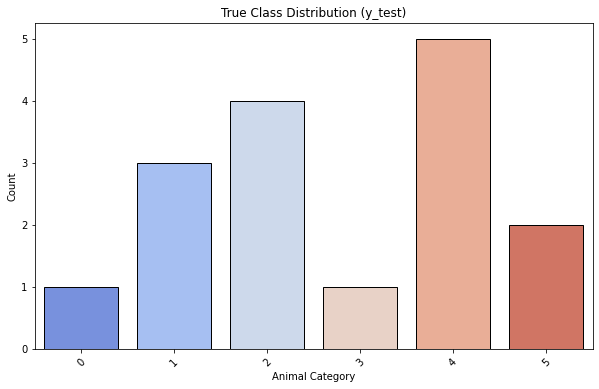

<Figure size 576x432 with 0 Axes>

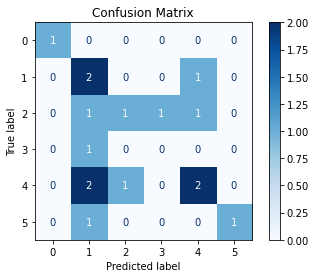

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

# Load dataset from CSV file
df = pd.read_csv('animal.csv')

# Check the first few rows of the dataset
print(df.head())

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

# Encode the 'Category', 'Diet', and 'Color' columns
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
df['Color'] = label_encoder.fit_transform(df['Color'])

# Selecting features and target variable
X = df[['Weight', 'Height', 'Diet', 'Color']]  # Feature columns
y = df['Category']  # Target variable (Animal Category)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier and train it
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Check the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")
classification_report=classification_report(y_pred,y_test)
print("Classification Report:\n",classification_report)

# Bar plot for the distribution of true labels in y_test
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='coolwarm',edgecolor='black')
plt.title('True Class Distribution (y_test)')
plt.xlabel('Animal Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Predict the labels on the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique classes from y_test (use this as labels)
unique_classes = sorted(set(y_test))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

